<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/Understand_band_data_info_using_histogram_and_classifying_pixel_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/


In [2]:
!pip install rioxarray


In [3]:
!pip install geopandas

In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd



In [5]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif'
#os.chdir(path)
#data_path = os.path.join("/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif")
data = rxr.open_rasterio(path)

In [6]:
data.shape

(1, 20, 20)

In [7]:
!pip install earthpy

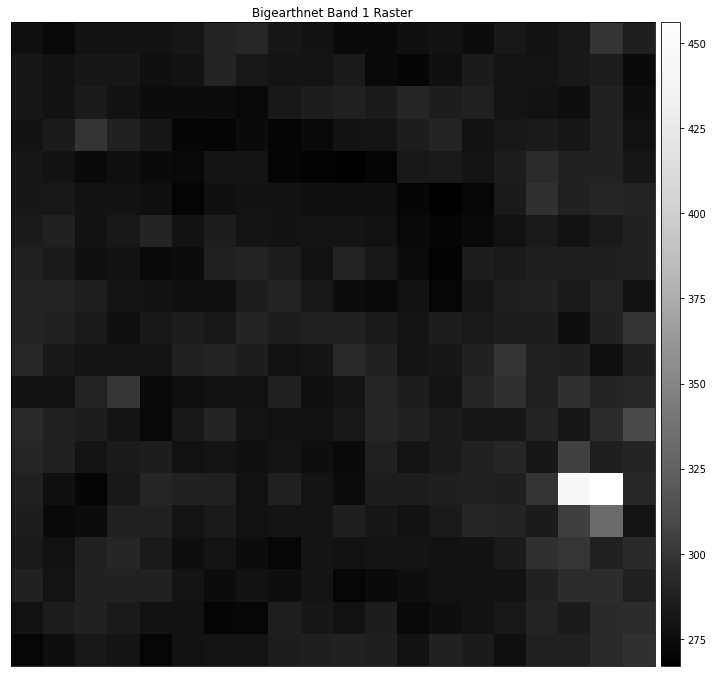

In [8]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
ep.plot_bands(data,
              title="Bigearthnet Band 1 Raster")
plt.show()

In [9]:
#https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html
#rasterio.plot.reshape_as_image(arr)
#Returns the source array reshaped into the order expected by image processing and visualization software (matplotlib, scikit-image, etc) by swapping the axes order from (bands, rows, columns) to (rows, columns, bands)


In [10]:
print('min value:', np.nanmin(data))
print('max value:', np.nanmax(data))

min value: 267
max value: 456


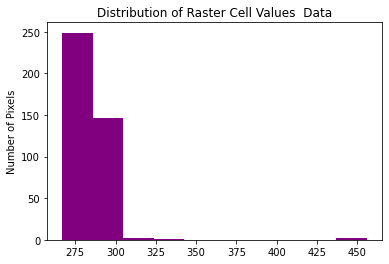

In [11]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [12]:
bins=[0, 100, 200, 250, 275, 300,350]

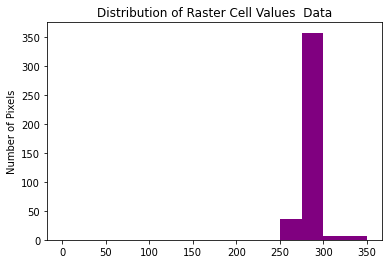

In [13]:
f, ax = plt.subplots()
data.plot.hist(color="purple",bins=[0, 100, 200, 250, 275, 300,350])
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [14]:
class_bins = [-np.inf,250,275,300,350,+np.inf]


In [15]:
import xarray as xr
data_class = xr.apply_ufunc(np.digitize,
                                     data,
                                     class_bins)
print(data_class.shape)
#data_class = np.array(data_class[0])

(1, 20, 20)


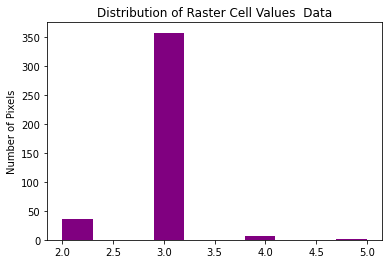

In [16]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data_class.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [17]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif'
#os.chdir(path)
#data_path = os.path.join("/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif")
data = rxr.open_rasterio(path)
print("The CRS of this data is:", data.rio.crs)

The CRS of this data is: EPSG:32634


In [18]:
#https://www.spatialreference.org/ref/epsg/32634/
#/*EPSG:32634

#WGS 84 / UTM zone 34N (Google it)

#WGS84 Bounds: 18.0000, 0.0000, 24.0000, 84.0000
#Projected Bounds: 166021.4431, 0.0000, 833978.5569, 9329005.1825
#Scope: Large and medium scale topographic mapping and engineering survey.
#Last Revised: June 2, 1995
#Area: World - N hemisphere - 18°E to 24°E - by country*/

#Proj4js.defs["EPSG:32634"] = "+proj=utm +zone=34 +ellps=WGS84 +datum=WGS84 +units=m +no_defs";

In [19]:
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)

+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs


In [20]:
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.

data.rio.bounds()

(499980.0, 7032840.0, 501180.0, 7034040.0)

In [21]:
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
data.rio.resolution()

(60.0, -60.0)

In [22]:
# View generate metadata associated with the raster file
print("The crs of your data is:", data.rio.crs)
print("The nodatavalue of your data is:", data.rio.nodata)
print("The shape of your data is:", data.shape)
print("The spatial resolution for your data is:", data.rio.resolution())
print("The metadata for your data is:", data.attrs)

The crs of your data is: EPSG:32634
The nodatavalue of your data is: None
The shape of your data is: (1, 20, 20)
The spatial resolution for your data is: (60.0, -60.0)
The metadata for your data is: {'scale_factor': 1.0, 'add_offset': 0.0}


In [23]:
# How many bands / layers does the object have?
print("Number of bands", data.rio.count)

Number of bands 1


In [24]:
!pip install georaster

In [ ]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip


In [ ]:
import georaster
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8,8))
# full path to the geotiff file
fpath = r"/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif"  # Thailand east

# read extent of image without loading
# good for values in degrees lat/long
# geotiff may use other coordinates and projection
my_image = georaster.SingleBandRaster(fpath, load_data=False)

# grab limits of image's extent
minx, maxx, miny, maxy = my_image.extent

# set Basemap with slightly larger extents
# set resolution at intermediate level "i"
m = Basemap( projection='cyl', \
            llcrnrlon=minx-2, \
            llcrnrlat=miny-2, \
            urcrnrlon=maxx+2, \
            urcrnrlat=maxy+2, \
            resolution='i')

m.drawcoastlines(color="gray")
m.fillcontinents(color='beige')

# load the geotiff image, assign it a variable
image = georaster.SingleBandRaster( fpath, \
                        load_data=(minx, maxx, miny, maxy), \
                        latlon=True)

# plot the image on matplotlib active axes
# set zorder to put the image on top of coastlines and continent areas
# set alpha to let the hidden graphics show through
plt.imshow(image.r, extent=(minx, maxx, miny, maxy), zorder=10, alpha=0.6)

plt.show()